In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import PAC_utils as ut

In [4]:
df_entregas = pd.read_excel('pedidos_acumulados.xlsx')
df_entregas.head()

,marca_temporal,bolson_verdes,bolson_pesadas,combo_verdes_pesadas_maple,peras,docena_huevos,banana,yerba_las_tunas_1kg,miel,media_docena_huevos,...,naranja_sanguinea,romero,laurel,tomate_cherry,manzana_roja,manzana_verde,lechuga_francesa,manteca,frutilla,rebozador_mandioca
0,2023-05-13,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-05-14,0,0,1,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-05-15,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-05-15,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-05-15,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_precios = pd.read_excel('tabla_precios_acumulada.xlsx')
df_precios

,fecha_entrega,bolson_verdes,bolson_pesadas,combo_verdes_pesadas_maple,peras,docena_huevos,banana,yerba_las_tunas_1kg,miel,media_docena_huevos,...,Papa colorada de Mar del Plata - 1kg -,"Arroz largo fino integral ""Pampa's Rice"" - 1kg -","Aceite de girasol ""Lago Espejo"" 1,5 lts -","Aceitunas verdes orgánicas ""San Nicolás"" 500gr -","Queso danbo feteado ""Nuevo amanecer"" bandeja 150g -","Garbanzo orgánico ""Salve la Tierra"" 500g -","Lentejas orgánicas ""Salve la Tierra"" 500g -","Arroz yamaní integral ""Pampa's Rice"" - 1kg -","Azúcar blanca orgánica ""San Isidro"" - 1kg -",¡NUEVA! Carpincho bosque - blanca -
0,2023-05-20,1500,1390,5315,530,1185,880,1550,795,600,...,0,0,0,0,0,0,0,0,0,0
1,2023-06-03,1500,1390,5315,530,1185,775,1550,0,600,...,0,0,0,0,0,0,0,0,0,0
2,2023-06-17,1860,1665,5880,530,1210,780,1550,0,605,...,0,0,0,0,0,0,0,0,0,0
3,2023-07-01,1860,1590,5805,615,1210,785,1550,0,605,...,0,0,0,0,0,0,0,0,0,0
4,2023-07-15,1860,1485,5695,615,1210,785,1550,0,605,...,0,0,0,0,0,0,0,0,0,0
5,2023-07-29,1860,1580,5790,575,1210,880,1720,0,605,...,0,0,0,0,0,0,0,0,0,0
6,2023-08-12,1860,1595,5665,575,1145,790,1720,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2023-08-26,1860,1610,5900,765,1245,795,1720,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2023-09-09,2500,1865,7125,615,1430,805,1720,1790,0,...,0,0,0,0,0,0,0,0,0,0
9,2023-09-23,2500,1800,7220,660,1635,805,2085,1790,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#definimos una funcion para listar fechas de entrega a fin de usarlas como variable en gráficos (pueden ser todas las fechas o las de una tabla ya recortada)
def extraer_fecha(fecha):
    return fecha.date()

#funciona

def listar_fechas_entrega(df):
    return df['fecha_entrega'].apply(extraer_fecha)

#funciona

In [19]:
def tabla_cantidad_pedidos(df,lista_productos):
    #lista_productos debe ser una cadena de strings con nombres iguales a los de las columnas de interés
    df_productos_elegidos = df[['fecha_entrega']+lista_productos]
    df_pedidos_por_fecha = df_productos_elegidos.groupby(['fecha_entrega']).sum().reset_index()
    return df_pedidos_por_fecha

#funciona

def graficar_pedidos(df,lista_productos):
    df_pedidos_por_fecha = tabla_cantidad_pedidos(df,lista_productos)
    #fechas_entrega = listar_fechas_entrega(df_pedidos_por_fecha)
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    ax.set_xlabel('fecha de entrega')
    ax.set_ylabel('pedidos por producto')
    for producto in lista_productos:
        ax.plot(df_pedidos_por_fecha[['fecha_entrega']],df_pedidos_por_fecha[[producto]],label=producto)
        #en caso de preferir un punto por fecha de entrega en lugar de lineas, cambiar plot por scatter
    ax.legend(loc='upper right')
    plt.show()
    return 0

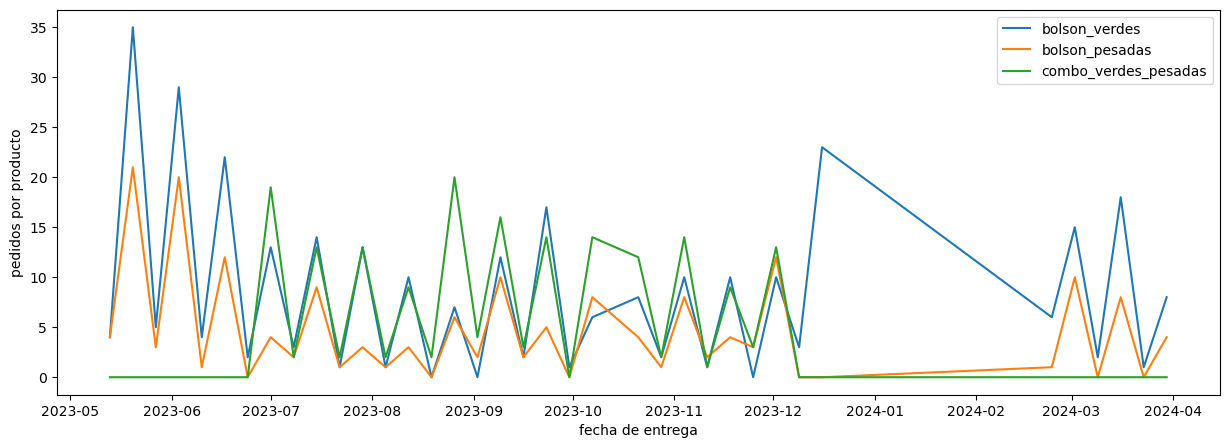

0

In [9]:
graficar_pedidos(df_entregas,['bolson_verdes','bolson_pesadas','combo_verdes_pesadas'])

In [ ]:
#graficar precios de productos a lo largo del tiempo

#estudiar la evolución de las ventas junto con el tiempo. ¿Cómo?
#Por ejemplo, porcentaje de variación de ventas y precios en función de la fecha de entrega

In [8]:
def graficar_precios(df_precios,lista_productos):
    #fechas_entrega = listar_fechas_entrega(df_pedscatteridos_por_fecha)
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    ax.set_xlabel('fecha de entrega')
    ax.set_ylabel('precios por producto')
    for producto in lista_productos:
        ax.plot(df_precios['fecha_entrega'],df_precios[producto],label=producto)
        display(df_precios[producto].head())
        #en caso de preferir un punto por fecha de entrega en lugar de lineas, cambiar plot por scatter
    ax.legend(loc='upper right')
    plt.show()
    return 0

In [15]:
df_precios["bolson_verdes"].head()

0    1500
1    1500
2    1860
3    1860
4    1860
Name: bolson_verdes, dtype: int64

0    1500
1    1500
2    1860
3    1860
4    1860
Name: bolson_verdes, dtype: int64

0    1390
1    1390
2    1665
3    1590
4    1485
Name: bolson_pesadas, dtype: int64

0       0
1       0
2       0
3    3180
4    3080
Name: combo_verdes_pesadas, dtype: int64

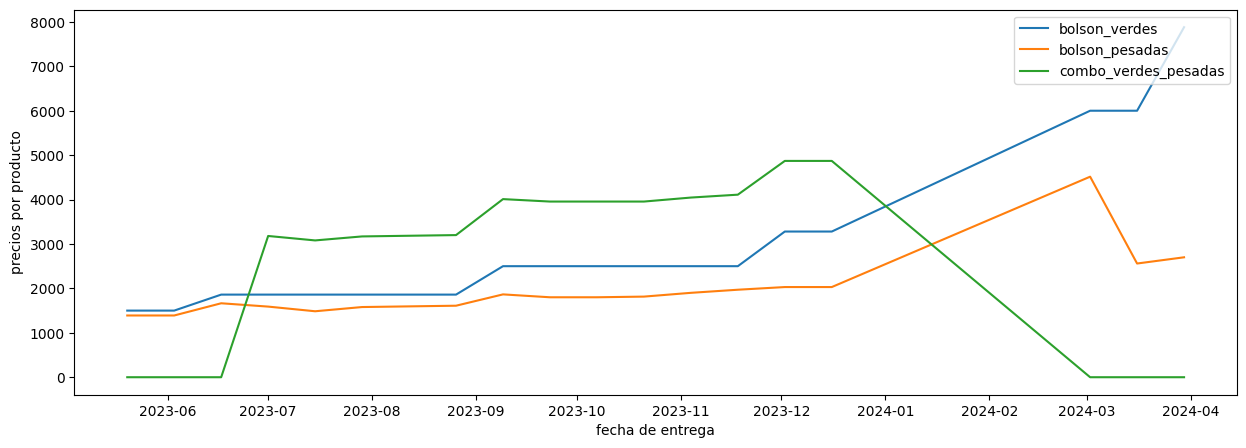

0

In [9]:
graficar_precios(df_precios,['bolson_verdes','bolson_pesadas','combo_verdes_pesadas'])

In [47]:
dif=np.array(df_precios['bolson_verdes'].loc[1:])
np.log(dif+1)

array([7.31388683, 7.52886926, 7.52886926, 7.52886926, 7.52886926,
       7.52886926, 7.52886926, 7.82444593, 7.82444593, 7.82444593,
       7.82444593, 7.82444593, 7.82444593, 8.09590353, 8.09590353,
       8.6996814 , 8.6996814 , 8.97221008])

In [10]:
def graficar_precios_vs_ventas(entregas,precios,producto_elegido):
    fig, ax = plt.subplots()
    fig.set_size_inches(15,5)
    df_pedidos_por_fecha = tabla_cantidad_pedidos(entregas,[producto_elegido])
    lista_precios = np.array(precios[producto_elegido])
    lista_entregas = np.array(entregas[producto_elegido])
    ax.set_xlabel('fecha de entrega')
    ax.set_ylabel('logaritmo del precio y cantidad de ventas')
    ax.plot(precios['fecha_entrega'],np.log(lista_precios+1),label='log precios '+producto_elegido) #aplicamos logaritmo para poder graficar ambas cosas en la misma escala
    ax.plot(df_pedidos_por_fecha['fecha_entrega'],np.log(df_pedidos_por_fecha[producto_elegido]+1),label='log ventas '+producto_elegido)
    return 0

0

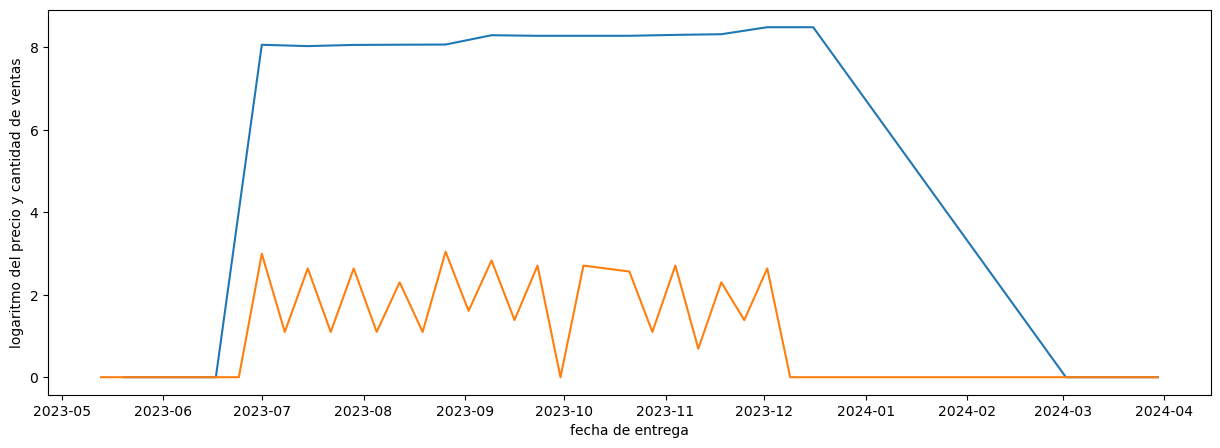

In [11]:
#print(tabla_cantidad_pedidos(df_entregas,['bolson_verdes']))
graficar_precios_vs_ventas(df_entregas,df_precios,'combo_verdes_pesadas')

In [11]:
#Rankear los pedidos por cliente

pedidos_por_cliente = df_entregas.groupby(['id']).count()
pedidos_por_cliente
ranking_pedidos = pedidos_por_cliente.sort_values(by='marca_temporal',ascending=False)
ranking_pedidos #esta tabla muestra la cantidad de veces que cada cliente pidió cada producto, ordenada en forma decreciente por cantidad de fechas en las que pidió.

,marca_temporal,bolson_verdes,bolson_pesadas,combo_verdes_pesadas_maple,peras,docena_huevos,banana,yerba_las_tunas_1kg,miel,media_docena_huevos,...,naranja_sanguinea,romero,laurel,tomate_cherry,manzana_roja,manzana_verde,lechuga_francesa,manteca,frutilla,rebozador_mandioca
id,,,,,,,,,,,,,,,,,,,,,
4,24,24,24,24,16,21,21,23,15,8,...,13,3,6,16,10,10,15,8,14,12
3,23,23,23,23,14,18,18,22,15,7,...,11,3,8,15,8,8,15,10,14,12
10,21,21,21,21,14,17,17,19,13,7,...,10,2,6,14,8,8,13,9,12,10
2,21,21,21,21,15,18,18,20,12,8,...,11,3,6,13,8,8,12,8,11,9
14,20,20,20,20,14,17,17,19,12,6,...,11,2,5,14,9,9,12,8,11,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1,1,1,1,0,0,0,1,1,0,...,0,0,1,1,0,0,1,1,1,0
70,1,1,1,1,0,0,0,1,1,0,...,0,0,1,1,0,0,1,1,1,0
71,1,1,1,1,0,0,0,1,1,0,...,0,0,1,1,0,0,1,1,1,0


In [27]:
ut.aplicar_filtros(df_entregas,clientes=[1,2,3,4,10],fecha_inicial='2023/8/23',fecha_final='2024/5/31',barrios=['almagro','palermo'])
#ut.aplicar_filtros(df_entregas,clientes=[1,2,3,4,10],fecha='2023/8/23',barrios=['almagro','palermo'])

,marca_temporal,bolson_verdes,bolson_pesadas,combo_verdes_pesadas_maple,peras,docena_huevos,banana,yerba_las_tunas_1kg,miel,media_docena_huevos,...,naranja_sanguinea,romero,laurel,tomate_cherry,manzana_roja,manzana_verde,lechuga_francesa,manteca,frutilla,rebozador_mandioca
393,2023-08-20,0,0,1,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN
394,2023-08-20,0,1,0,0.0,1.0,0.0,0.0,NaN,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN
450,2023-09-02,0,0,0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
451,2023-09-03,0,0,0,0.0,1.0,0.0,0.0,1.0,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
452,2023-09-04,0,0,1,0.0,0.0,1.0,0.0,0.0,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1024,2024-03-25,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1025,2024-03-26,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1026,2024-03-26,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
1032,2024-03-25,0,0,0,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [ ]:
#aplicamos a la tabla de precios el único filtro válido: el de fechas.

ut.aplicar_filtros(df_precios,fecha='2023/6/17') #también se puede poner fecha inicial y final.

,fecha_entrega,bolson_verdes,bolson_pesadas,combo_verdes_pesadas_maple,peras,docena_huevos,banana,yerba_las_tunas_1kg,miel,media_docena_huevos,...,Papa colorada de Mar del Plata - 1kg -,"Arroz largo fino integral ""Pampa's Rice"" - 1kg -","Aceite de girasol ""Lago Espejo"" 1,5 lts -","Aceitunas verdes orgánicas ""San Nicolás"" 500gr -","Queso danbo feteado ""Nuevo amanecer"" bandeja 150g -","Garbanzo orgánico ""Salve la Tierra"" 500g -","Lentejas orgánicas ""Salve la Tierra"" 500g -","Arroz yamaní integral ""Pampa's Rice"" - 1kg -","Azúcar blanca orgánica ""San Isidro"" - 1kg -",¡NUEVA! Carpincho bosque - blanca -
2,2023-06-17,1860,1665,5880,530,1210,780,1550,0,605,...,0,0,0,0,0,0,0,0,0,0


In [31]:
def ultima_fecha_producto(df, producto):
    pedidos = df[df[producto].fillna(0) > 0]
    resultado = pedidos["marca_temporal"].max().date()
    if not pedidos.empty:
        return f'La úlima vez que se pidió el producto {producto} fue en {resultado}'
    else:
        return f"El producto {producto} nunca fue pedido"


In [32]:
ultima_fecha_producto(df_entregas, "tintura" )

'El producto tintura nunca fue pedido'

In [52]:
def tabla_ranking_nodo(df, columna_nodo='casa_popular', nodo=None):
    df_filtrado = df[df[columna_nodo].notna() & (df[columna_nodo] != 0) & (df[columna_nodo] != '0')]

    columnas_excluir = ['marca_temporal', 'id', 'fecha_entrega', columna_nodo]
    columnas_productos = [col for col in df.columns if col not in columnas_excluir]

    df_productos = df_filtrado[[columna_nodo] + columnas_productos].copy()
    df_productos[columnas_productos] = df_productos[columnas_productos].fillna(0)    

    resumen = df_productos.groupby(columna_nodo)[columnas_productos].sum().transpose()
    resumen['total_global'] = resumen.sum(axis=1)
    resumen = resumen.sort_values(by='total_global', ascending=False).drop(columns='total_global')

    if nodo is not None:
        if nodo in resumen.columns:
            resumen = resumen[[nodo]].sort_values(by=nodo, ascending=False)
        else:
            print(f"Nodo '{nodo}' no encontrado.")
            return pd.DataFrame()

    return resumen



In [59]:
ranking_tabla = tabla_ranking_nodo(df_entregas)
print(ranking_tabla.head(10))


casa_popular     almagro  palermo  villa crespo  villa urquiza
zanahoria           66.0     79.0          81.0          116.0
bolson_verdes       63.0    102.0          55.0           98.0
ajo                 54.0     76.0          44.0          110.0
tomate              49.0     51.0          80.0          104.0
limones             66.0     47.0          49.0           80.0
bolson_frutas       42.0     54.0          46.0           96.0
zapallo_anco        42.0     51.0          71.0           72.0
naranja             29.0     58.0          47.0           99.0
mandarina           27.0     80.0          46.0           49.0
zapallo_kabutia     27.0     52.0          57.0           63.0


## Graficos de ventas separados por mitad de mes

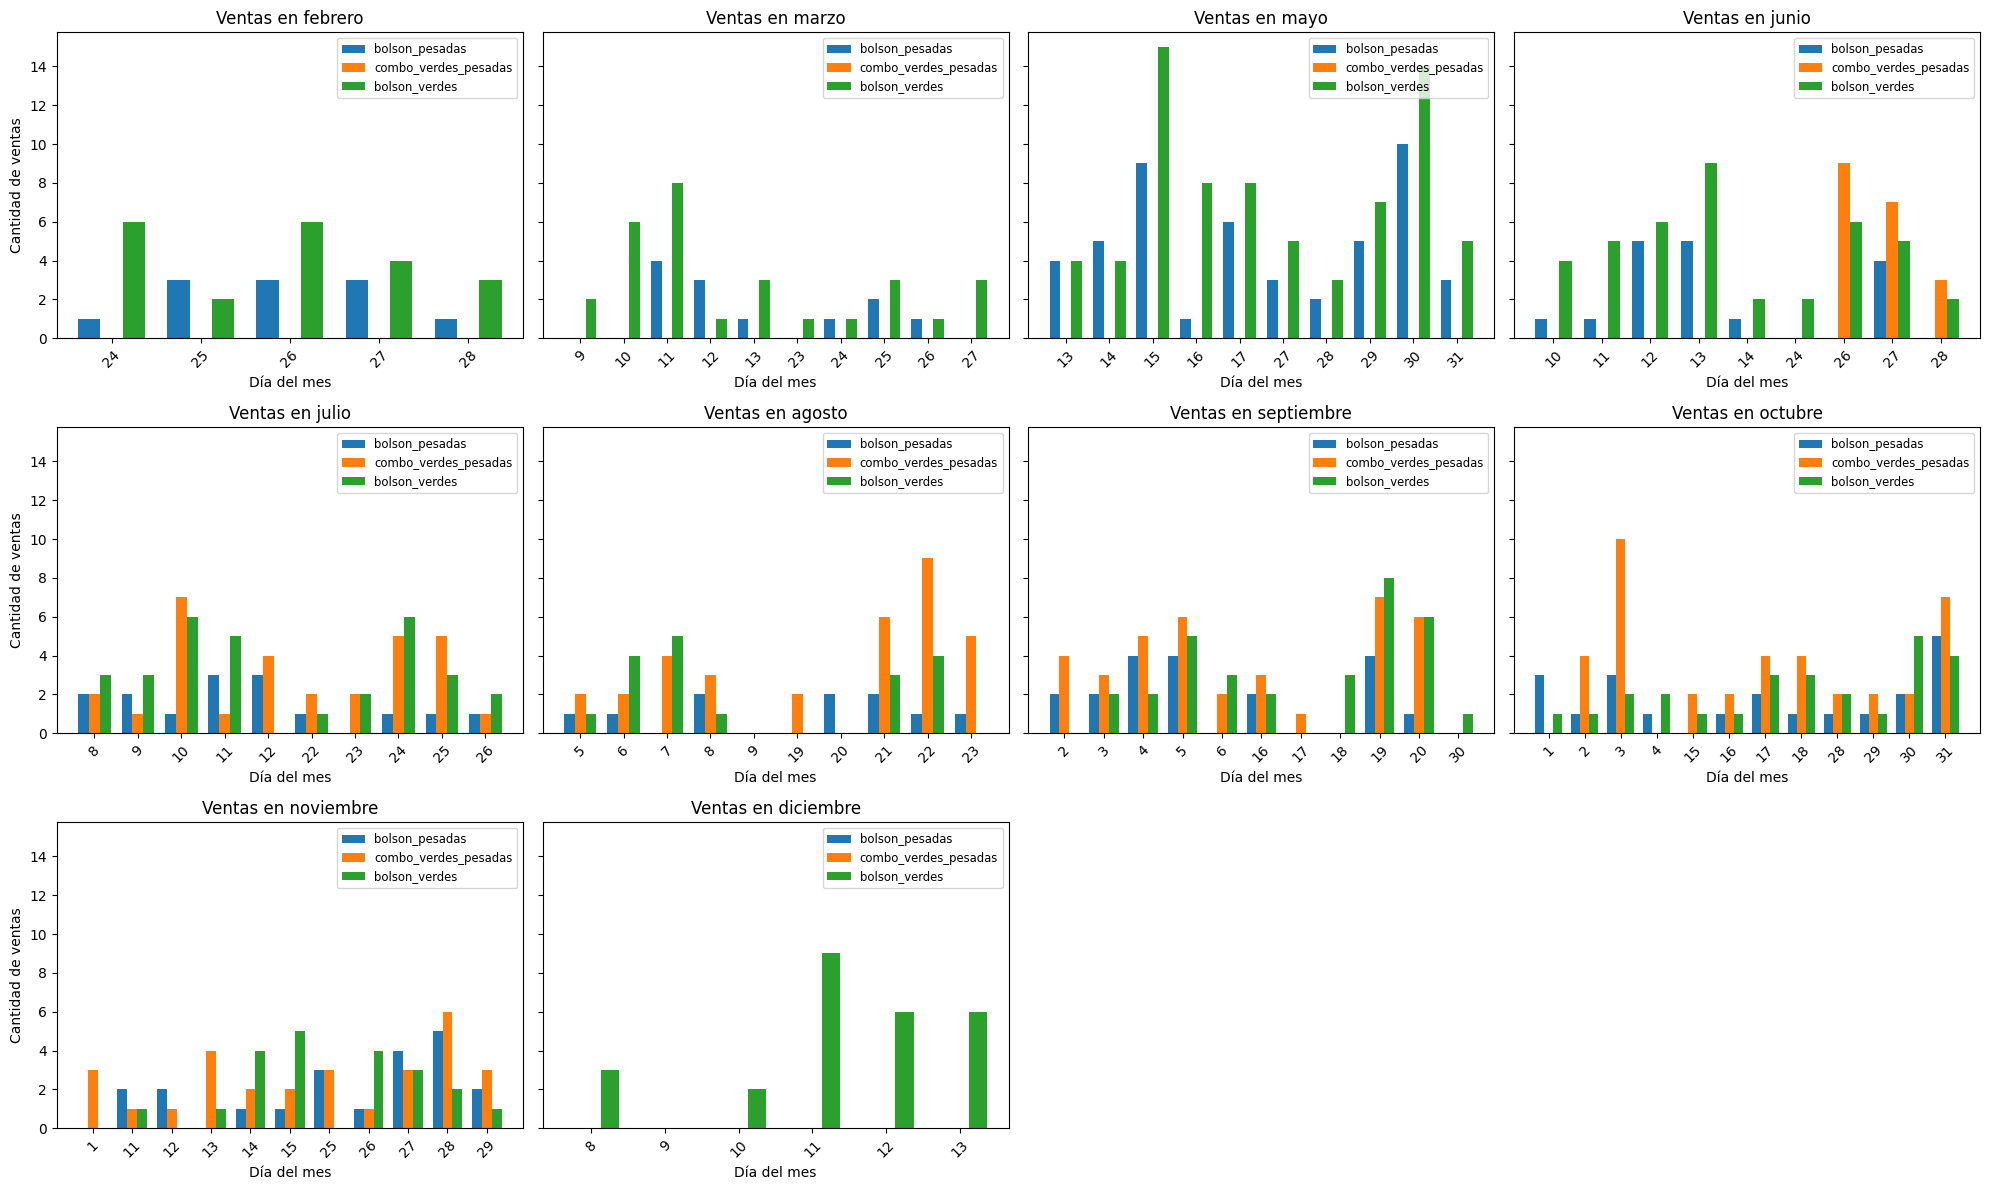

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import ceil

def cantidad_de_ventas_por_dia(df: pd.DataFrame, columna_fecha: str, lista_productos: list[str], meses: list[int]=None):
    # Preparar datos
    fechas_productos = df[[columna_fecha] + lista_productos].copy()
    fechas_productos[columna_fecha] = pd.to_datetime(fechas_productos[columna_fecha])
    fechas_productos["dias"] = fechas_productos[columna_fecha].dt.day
    fechas_productos["meses"] = fechas_productos[columna_fecha].dt.month

    nombre_mes = ["enero","febrero","marzo","abril","mayo","junio",
                  "julio","agosto","septiembre","octubre","noviembre","diciembre"]

    # Agregar por mes y día
    fechas_productos_agg = fechas_productos[["meses", "dias"] + lista_productos] \
        .groupby(["meses", "dias"], as_index=False) \
        .sum()

    # Definir qué meses graficar
    if meses is None:
        meses_a_graficar = sorted(fechas_productos_agg["meses"].unique())
    else:
        meses_a_graficar = sorted(meses)

    n = len(meses_a_graficar)
    # Armar grilla: 4 columnas como máximo para que no quede muy ancho
    ncols = 4
    nrows = ceil(n / ncols)
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows), sharey=True)
    axes_flat = axes.flatten() if isinstance(axes, np.ndarray) else [axes]

    bar_width = 0.25  # ancho de cada barra

    for idx, mes in enumerate(meses_a_graficar):
        ax = axes_flat[idx]
        subset = fechas_productos_agg[fechas_productos_agg["meses"] == mes]
        if subset.empty:
            ax.set_visible(False)
            continue

        dias = subset["dias"].unique()
        dias_sorted = np.sort(dias)
        x = np.arange(len(dias_sorted))

        # para centrar ticks
        total_groups = len(lista_productos)
        for i, producto in enumerate(lista_productos):
            # extraer valores alineados a dias_sorted (rellenar con 0 si falta)
            valores = []
            for d in dias_sorted:
                row = subset[(subset["dias"] == d)]
                if not row.empty:
                    valores.append(row.iloc[0][producto])
                else:
                    valores.append(0)
            ax.bar(x + i * bar_width, valores, width=bar_width, label=producto)

        ax.set_title(f"Ventas en {nombre_mes[mes - 1]}")
        ax.set_xticks(x + bar_width * (total_groups - 1) / 2)
        ax.set_xticklabels(dias_sorted, rotation=45)
        ax.set_xlabel("Día del mes")
        if idx % ncols == 0:
            ax.set_ylabel("Cantidad de ventas")
        ax.legend(fontsize="small", loc="upper right")

    # ocultar subplots extras
    for j in range(len(meses_a_graficar), nrows * ncols):
        axes_flat[j].set_visible(False)

    plt.tight_layout()
    plt.show()
cantidad_de_ventas_por_dia(df_entregas,"marca_temporal",['bolson_pesadas','combo_verdes_pesadas','bolson_verdes'])

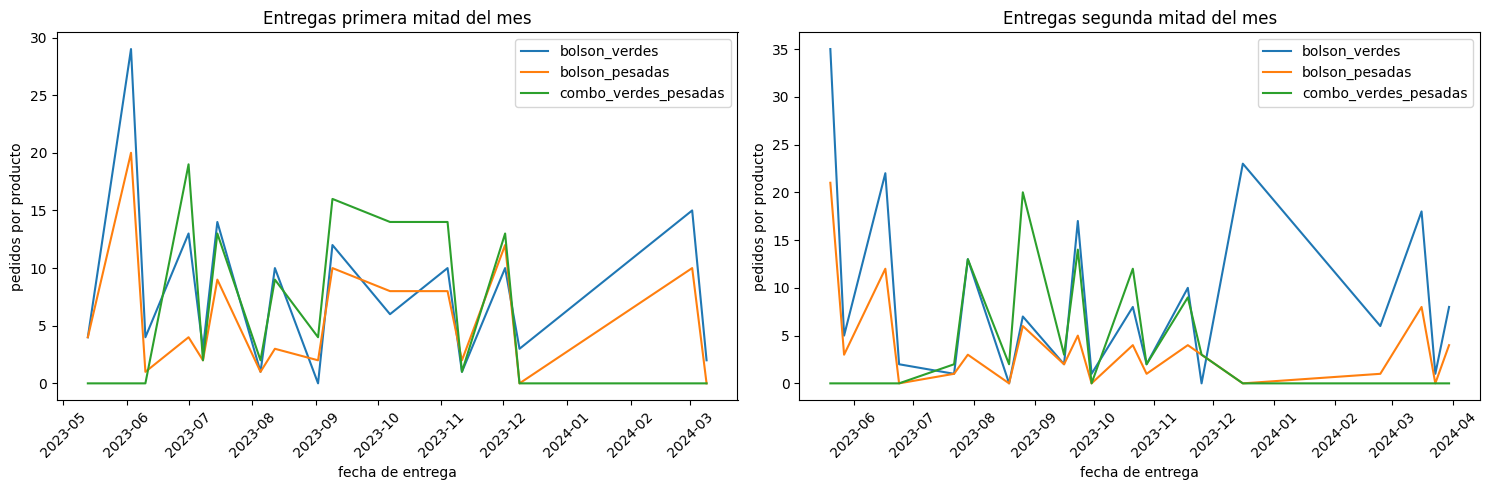

In [81]:
def separar_por_dia(df: pd.DataFrame,columna_fecha: str,umbral_dia:int)->pd.Series:
  index_primer_parte_mes=df[columna_fecha].dt.day<=umbral_dia
  index_segunda_parte_mes=df[columna_fecha].dt.day>umbral_dia
  return index_primer_parte_mes, index_segunda_parte_mes


separar_por_dia(df_entregas,"marca_temporal",15)

def graficar_por_partes(df:pd.DataFrame,lista_productos:list[str],columna_fecha :str,umbral_dia:int):

    df_pedidos_por_fecha = tabla_cantidad_pedidos(df,lista_productos)
    #print(df_pedidos_por_fecha)
    primer_parte, segunda_parte = separar_por_dia(df_pedidos_por_fecha,"fecha_entrega",umbral_dia)    
    
    df1=df_pedidos_por_fecha.loc[primer_parte]
    df2=df_pedidos_por_fecha.loc[segunda_parte]
    dfs=(df1,df2)
    fig,ax= plt.subplots(1,2,figsize=(15,5))
    
    ax[0].set_title("Entregas primera mitad del mes")
    ax[1].set_title("Entregas segunda mitad del mes")
    for i in range(2):
        ax[i].set_xlabel('fecha de entrega')
        ax[i].set_ylabel('pedidos por producto')
        for producto in lista_productos:
            ax[i].plot(dfs[i]['fecha_entrega'], dfs[i][producto], label=producto)
        #en caso de preferir un punto por fecha de entrega en lugar de lineas, cambiar plot por scatter
        ax[i].legend(loc='upper right')
        ax[i].tick_params(axis='x', labelrotation=45)
        plt.tight_layout()
    plt.show()
    
graficar_por_partes(df_entregas,['bolson_verdes','bolson_pesadas','combo_verdes_pesadas'],"marca_temporal",15)